## Download and import packages

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

#import required packages

from numpy import mean, std
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import gdown

import copy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Download Data and Load Data

In [2]:
# Download from Google Drive
url = 'https://drive.google.com/uc?id=' + '1BmICPGpdRg1dPmXi0G3Fe5IWs1MobCu8' #(URI ID)
output = './iris.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1BmICPGpdRg1dPmXi0G3Fe5IWs1MobCu8
To: E:\Jupyternotebook\code_basics\New folder\iris.data
100%|█████████████████████████████████████████████████████████████████████████████| 4.55k/4.55k [00:00<00:00, 3.02MB/s]


'./iris.data'

In [3]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=",", header=None)
#Display the first few rows in the dataframe
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Loading the dataset
iris = datasets.load_iris()
#Creating a dataframe
df = pd.DataFrame(iris.data)
df['class'] = iris.target
y = df['class'].values
x = df.drop(['class'],axis=1).values

In [5]:
# Task1 Display the first few rows of the data
df.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualize Data

In [6]:
df.info

<bound method DataFrame.info of        0    1    2    3  class
0    5.1  3.5  1.4  0.2      0
1    4.9  3.0  1.4  0.2      0
2    4.7  3.2  1.3  0.2      0
3    4.6  3.1  1.5  0.2      0
4    5.0  3.6  1.4  0.2      0
..   ...  ...  ...  ...    ...
145  6.7  3.0  5.2  2.3      2
146  6.3  2.5  5.0  1.9      2
147  6.5  3.0  5.2  2.0      2
148  6.2  3.4  5.4  2.3      2
149  5.9  3.0  5.1  1.8      2

[150 rows x 5 columns]>

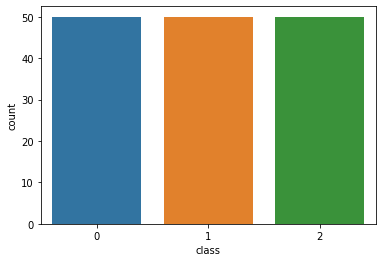

In [7]:
#Task2: Visualize the histogram of data classes
import seaborn as sns

sns.countplot(x= "class", data=df)
plt.show()

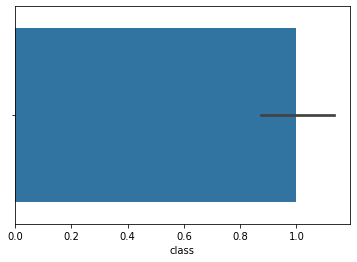

In [8]:
#Task2: Plot the histogram of values from any other attribute of choice

import seaborn as sns

sns.barplot(x= "class", data=df)
plt.show()

## Prepare data

To assess our model’s performance later, we will need to divide the data set into two parts: a training set and a
test set. The first is used to train the system, while the second is used to evaluate the learned or trained system.

Sklearn provides us with an easy way to randomly break up our data. We have decided to split the data with 20% as test and 80% as training.

In [9]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [10]:
y_train

array([0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 0])

## Train the Model

Hyper Parameters for Logistic Regression
1. penalty: Used to specify the norm used in the penalization. 
2. C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. max_iter: Maximum number of iterations taken for the solvers to converge.

Epoch: One Epoch is when an entire dataset is passed forward and backward through the classifier / neural network only once.

Iterations: Iterations is the number of batches that is passed forward and backward through the classifier.

In [11]:
# Delcare a Logistic Regression classifier
lr_clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
# Train the classifier until max_iterations
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
# predicting 
from sklearn.metrics import classification_report,confusion_matrix
lr_p=lr_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,lr_p))
# printing classification report
print(classification_report(y_test,lr_p))
print(accuracy_score(y_test,lr_p))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


Hyper Parameters for Decision Trees
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
 - Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
 - Entropy is a measure of information that indicates the disorder of the features with the target.
2. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
4. min_samples_split: The minimum number of samples required to split an internal node

In [13]:
# Declare a Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


Hyper Parameters for SVM
1. kernel: (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed') Specifies the kernel type to be used in the algorithm.
2. degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
3. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
4. max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [15]:
# Declare the SVM classifier
svm_clf = SVC(kernel='poly', degree=3, max_iter=300000)
# Train until max iterations
svm_clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

In [16]:
# predicting 
svm_p=svm_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,svm_p))
# printing classification report
print(classification_report(y_test,svm_p))
print(accuracy_score(y_test,svm_p))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


Hyper Parameters for LinearRegression:
1. fit_intercept: Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered)
2. normalize: If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

In [17]:
# Linear classifier
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Gaussian Naive Bayes:
The likelihood of the features is assumed to be Gaussian. Paramters are
1. priors: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
2. var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

In [18]:
# Gaussian Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [39]:
# predicting 
nb_p=nb_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,nb_p))
# printing classification report
print(classification_report(y_test,nb_p))
print(accuracy_score(y_test,nb_p))

[[4 1 5]
 [2 3 4]
 [5 3 3]]
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.43      0.33      0.38         9
           2       0.25      0.27      0.26        11

    accuracy                           0.33        30
   macro avg       0.35      0.34      0.34        30
weighted avg       0.34      0.33      0.34        30

0.3333333333333333


In [40]:
# Task 3
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

max accuracy is 0.3333333333333333 when neighbors are 3


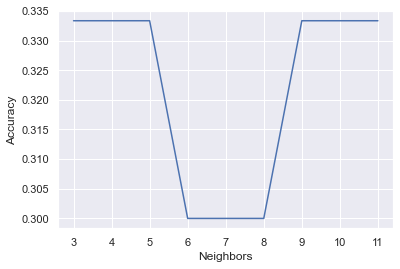

In [41]:
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')



In [42]:
from sklearn.neighbors import KDTree

import numpy as np
kdt = KDTree(X_test, leaf_size=20, metric='euclidean')
kdt.query(X_test, k=2, return_distance=True)

(array([[0.        , 0.17320508],
        [0.        , 0.2236068 ],
        [0.        , 0.38729833],
        [0.        , 0.36055513],
        [0.        , 0.77459667],
        [0.        , 0.2       ],
        [0.        , 0.38729833],
        [0.        , 0.14142136],
        [0.        , 0.14142136],
        [0.        , 0.43588989],
        [0.        , 0.14142136],
        [0.        , 0.78740079],
        [0.        , 0.2       ],
        [0.        , 0.2236068 ],
        [0.        , 0.52915026],
        [0.        , 0.36055513],
        [0.        , 0.2236068 ],
        [0.        , 1.47309199],
        [0.        , 0.24494897],
        [0.        , 0.41231056],
        [0.        , 0.14142136],
        [0.        , 0.38729833],
        [0.        , 0.38729833],
        [0.        , 0.14142136],
        [0.        , 0.2236068 ],
        [0.        , 0.38729833],
        [0.        , 0.47958315],
        [0.        , 0.45825757],
        [0.        , 0.2236068 ],
        [0.   

In [43]:
# Task 4 Implement two other classifiers of your choice

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [44]:
# predicting 
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))

[[4 1 5]
 [2 4 3]
 [5 3 3]]
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.50      0.44      0.47         9
           2       0.27      0.27      0.27        11

    accuracy                           0.37        30
   macro avg       0.38      0.37      0.37        30
weighted avg       0.37      0.37      0.37        30

0.36666666666666664


In [45]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[lr_clf,dt_clf,svm_clf,knn_clf,ada_clf,nb_clf]
predictions=[lr_p,dt_p,svm_p,knn_p,ada_p,nb_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')

accuracy with LogisticRegression : 0.3333333333333333
accuracy with DecisionTreeClassifier : 0.3333333333333333
accuracy with SVC : 0.3333333333333333
accuracy with KNeighborsClassifier : 0.3333333333333333
accuracy with AdaBoostClassifier : 0.36666666666666664
accuracy with GaussianNB : 0.3333333333333333


## Evaluate the Model

Now we predict using our trained model on the test set we created and evaluate our model on unforeseen data.
The performance will be reflected in various standard metrics.

In [46]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 2, 0, 2, 2])

In [47]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [48]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.3333333333333333
Recall: 0.3333333333333333
Precision: 0.3333333333333333
F1-score: 0.3389406487232574


## Visualization of Results

In [49]:
## Task 5: Insert the code for visualizing the comfusion matrix here
#store the confusion matrix in the variable cm with dim:2x2

cm = confusion_matrix(y_test , y_pred)
cm

array([[4, 1, 5],
       [2, 3, 4],
       [5, 3, 3]], dtype=int64)

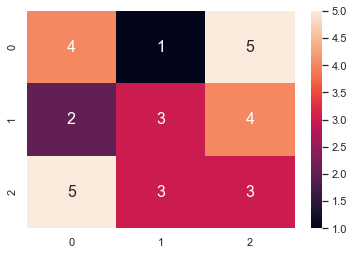

In [50]:
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [51]:
# Final model
model=LogisticRegression(solver='liblinear',class_weight= None,multi_class= 'ovr', 
                  dual=False, penalty= 'l2',C=0.3,max_iter=300000)
# train the model
model.fit(X_train,y_train)

# predicting activity labels
pred_y=model.predict(X_test)

In [52]:
# Task 5: Calculate ROC curve and find fpr, tpr, thresholds
from sklearn import metrics

fpr , tpr, thresholds = metrics.roc_curve(y_test,y_pred,pos_label=2)
tpr


array([0.        , 0.27272727, 0.54545455, 1.        ])

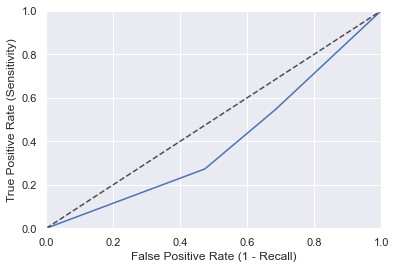



Area Under Curve: 0.39




In [53]:
# Display the values into a plot
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

## Comparing results with k-fold validation

In [54]:
# Implement K-fold validation and compare the perfromance with 80-20 random split (using sklearn methods)

# k-fold validation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
# Declare the number of splits to be used in k-fold validation
kf = KFold(shuffle=True, n_splits=5)
# Declare the metric to be used for evaluation in k-fold validation
metric = make_scorer(accuracy_score)
# Pass the model, data, labels, metric in cross validation method
scores = cross_val_score(clf, x, y, scoring=metric, cv=kf, n_jobs=-1)

In [55]:
scores

array([0.9       , 0.86666667, 0.96666667, 1.        , 0.96666667])

In [56]:
#Implement KNN model (not using sklearn).

import numpy as np
import scipy.spatial
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
output = './german.data'
X_train, y_pred, y_train, y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [57]:


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)

    def predict(self, y_pred):
        final_output = []
        for i in range(len(y_pred)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , y_pred[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, y_pred, y_test):
        predictions = self.predict(y_pred)
        return (predictions == y_test).sum() / len(y_test)

    
clf = KNN(3)
clf.fit(X_train, y_train)
prediction = clf.predict(y_pred)
for i in prediction:
    print(i, end= ' ')

prediction == y_test

clf.score(y_pred, y_test)



1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 

1.0

In [58]:
knn_user = KNN(3)
knn_user.fit(X_train, y_train)

prediction = clf.predict(X_test)

acc=clf.score(y_pred, y_test)
print(f'accuracy with user defined KNN is {acc}')

accuracy with user defined KNN is 1.0
